In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # For splitting data

import matplotlib
import sklearn
import scipy
import numpy
import sys

print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

sns.set(color_codes=True)
plt.style.available
%precision 2

matplotlib: 3.3.2
sklearn: 0.23.2
scipy: 1.5.2
seaborn: 0.11.0
pandas: 1.1.3
numpy: 1.19.4
Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


'%.2f'

## Setting output rows and columns

In [3]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Taking csv file with different separater
Data separator from ';' to ','

In [3]:
#data = pd.read_csv('ethereum_csv.csv')
#data.columns

In [4]:
#numeric_features = data.select_dtypes(include = [np.number])

In [5]:
#correlation = numeric_features.corr()

In [6]:
# Convert original data to csv data with separater as ,
'''
data = pd.read_csv('ethereum.csv',sep=';')
data.columns
numeric_features = data.select_dtypes(include = [np.number])
non_numeric_features = data.select_dtypes(exclude = [np.number])
numeric_features.head()
non_numeric_features.head()
data.to_csv('ethereum_data.csv')
'''

"\ndata = pd.read_csv('ethereum.csv',sep=';')\ndata.columns\nnumeric_features = data.select_dtypes(include = [np.number])\nnon_numeric_features = data.select_dtypes(exclude = [np.number])\nnumeric_features.head()\nnon_numeric_features.head()\ndata.to_csv('ethereum_data.csv')\n"

## Read data file

In [4]:
data = pd.read_csv('ethereum_data.csv') #The dataset is uploaded to the CAMCOS google drive

In [5]:
data.shape

(2056, 41)

### drop all null data

In [5]:
data = data.drop(index = [i for i in range(375)])

In [6]:
data = data.reset_index(drop = True)

In [7]:
data.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,8/8/2016,20439,6059,9111556,1503.805248,9.363531e+08,5.480000e+13,0.001254,0.014181,0.000420,0.004750,53.896575,609.564064,3.845016,32175.93750,14.185434,363906.1494,32175.93750,363906.1494,41.476742,26.309202,0.019117,11.309885,842.498262,3.258575,82790681.59,200458024.1,80365076.47,42984,75328,1996074.839,22575376.67,39.049717,441.647804,0.147550,1.668772,2941537.082,33268445.80,0.084186,0.091690,0.096432
1,8/9/2016,22799,6130,9757894,1591.826101,1.019313e+09,5.680000e+13,0.000669,0.008232,0.000420,0.005169,31.476820,387.387553,4.026739,32666.40625,14.395987,402027.8740,32666.40625,402027.8740,23.231663,28.501093,0.020933,12.307074,925.598034,12.274988,82823348.00,201198238.5,80397742.88,47057,55293,3565106.361,43876027.25,100.900193,1241.786121,1.003216,12.346657,5579074.348,68662079.99,0.081587,0.092947,0.097002
2,8/10/2016,21183,6054,9727492,1606.787578,1.002104e+09,5.890000e+13,0.000722,0.008733,0.000420,0.005080,33.422242,404.228564,4.124060,32162.96875,14.168621,388998.1577,32162.96875,388998.1577,18.237591,27.804614,0.020500,12.094597,1121.676503,14.461676,82855510.97,201485552.9,80425443.19,46290,52842,4543117.061,54947171.72,132.054508,1597.146110,1.003051,12.131497,6978024.323,84396394.72,0.081409,0.092723,0.096978
3,8/11/2016,22502,6068,9833228,1620.505603,9.702305e+08,6.010000e+13,0.000666,0.007797,0.000420,0.004916,32.086722,375.586648,4.222562,32196.09375,14.177705,376866.8875,32196.09375,376866.8875,23.096806,27.319899,0.019854,11.705361,808.801289,10.916083,82887707.06,201169569.2,80457639.28,48171,55715,3588708.648,42007128.84,105.464380,1234.498595,1.001092,11.718140,5875947.911,68780089.21,0.081366,0.092968,0.096048
4,8/12/2016,20078,6014,9375881,1559.009145,9.782911e+08,6.000000e+13,0.000680,0.008025,0.000422,0.004974,30.199867,356.299136,4.178023,32112.03125,14.135211,378858.9228,32112.03125,378858.9228,40.062236,27.835137,0.020092,11.798037,525.956955,12.929347,82919819.09,201143589.4,80489751.31,44400,49494,2069775.100,24419282.57,72.095478,850.585094,1.001518,11.815945,3568293.588,42098858.66,0.081356,0.092935,0.094796


In [8]:
data.shape

(1681, 41)

In [9]:
# Checking null data
data.isnull().sum()

date                  0
AdrActCnt             0
BlkCnt                0
BlkSizeByte           0
BlkSizeMeanByte       0
CapMrktCurUSD         0
DiffMean              0
FeeMeanNtv            0
FeeMeanUSD            0
FeeMedNtv             0
FeeMedUSD             0
FeeTotNtv             0
FeeTotUSD             0
HashRate              0
IssContNtv            0
IssContPctAnn         0
IssContUSD            0
IssTotNtv             0
IssTotUSD             0
NVTAdj                0
NVTAdj90              0
PriceBTC              0
PriceUSD              0
ROI1yr                0
ROI30d                0
SplyCur               0
SplyExpFut10yrCMBI    0
SplyFF                0
TxCnt                 0
TxTfrCnt              0
TxTfrValAdjNtv        0
TxTfrValAdjUSD        0
TxTfrValMeanNtv       0
TxTfrValMeanUSD       0
TxTfrValMedNtv        0
TxTfrValMedUSD        0
TxTfrValNtv           0
TxTfrValUSD           0
VtyDayRet180d         0
VtyDayRet30d          0
VtyDayRet60d          0
dtype: int64

In [10]:
# setting y variable
# setting block size
y = data['FeeTotUSD']

In [15]:
#data = data.drop(labels = ['BlkSizeByte'], axis = 1)

In [12]:
numeric_features = data.select_dtypes(include = [np.number])
correlation = numeric_features.corr()
print(correlation['FeeTotUSD'].sort_values(ascending = False))

FeeTotUSD             1.000000
FeeMeanUSD            0.997554
FeeMedUSD             0.997229
TxTfrValAdjUSD        0.854593
FeeTotNtv             0.809921
CapMrktCurUSD         0.802536
FeeMedNtv             0.778782
PriceUSD              0.758139
FeeMeanNtv            0.757943
TxTfrValUSD           0.648070
IssContUSD            0.589142
IssTotUSD             0.589142
BlkSizeByte           0.538060
HashRate              0.534120
BlkSizeMeanByte       0.521582
TxTfrCnt              0.503134
DiffMean              0.489021
TxCnt                 0.477530
TxTfrValAdjNtv        0.446512
TxTfrValMedUSD        0.397878
SplyCur               0.361492
TxTfrValMeanUSD       0.354392
SplyFF                0.326039
AdrActCnt             0.218916
BlkCnt                0.195830
TxTfrValNtv           0.130614
ROI30d                0.117145
VtyDayRet30d          0.061989
VtyDayRet60d          0.045325
ROI1yr                0.003050
PriceBTC             -0.018160
TxTfrValMedNtv       -0.099498
TxTfrVal

In [15]:
new_data=data.drop(['FeeMeanUSD','FeeMedUSD','TxTfrValAdjUSD','CapMrktCurUSD'],axis =1)

In [17]:
print(data.shape)
print(new_data.shape)

(1681, 41)
(1681, 37)


In [17]:
new_data.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,8/8/2016,20439,6059,9111556,1503.805248,9.363531e+08,5.480000e+13,0.001254,0.014181,0.000420,0.004750,53.896575,609.564064,3.845016,32175.93750,14.185434,363906.1494,32175.93750,363906.1494,41.476742,26.309202,0.019117,11.309885,842.498262,3.258575,82790681.59,200458024.1,80365076.47,42984,75328,1996074.839,22575376.67,39.049717,441.647804,0.147550,1.668772,2941537.082,33268445.80,0.084186,0.091690,0.096432
1,8/9/2016,22799,6130,9757894,1591.826101,1.019313e+09,5.680000e+13,0.000669,0.008232,0.000420,0.005169,31.476820,387.387553,4.026739,32666.40625,14.395987,402027.8740,32666.40625,402027.8740,23.231663,28.501093,0.020933,12.307074,925.598034,12.274988,82823348.00,201198238.5,80397742.88,47057,55293,3565106.361,43876027.25,100.900193,1241.786121,1.003216,12.346657,5579074.348,68662079.99,0.081587,0.092947,0.097002
2,8/10/2016,21183,6054,9727492,1606.787578,1.002104e+09,5.890000e+13,0.000722,0.008733,0.000420,0.005080,33.422242,404.228564,4.124060,32162.96875,14.168621,388998.1577,32162.96875,388998.1577,18.237591,27.804614,0.020500,12.094597,1121.676503,14.461676,82855510.97,201485552.9,80425443.19,46290,52842,4543117.061,54947171.72,132.054508,1597.146110,1.003051,12.131497,6978024.323,84396394.72,0.081409,0.092723,0.096978
3,8/11/2016,22502,6068,9833228,1620.505603,9.702305e+08,6.010000e+13,0.000666,0.007797,0.000420,0.004916,32.086722,375.586648,4.222562,32196.09375,14.177705,376866.8875,32196.09375,376866.8875,23.096806,27.319899,0.019854,11.705361,808.801289,10.916083,82887707.06,201169569.2,80457639.28,48171,55715,3588708.648,42007128.84,105.464380,1234.498595,1.001092,11.718140,5875947.911,68780089.21,0.081366,0.092968,0.096048
4,8/12/2016,20078,6014,9375881,1559.009145,9.782911e+08,6.000000e+13,0.000680,0.008025,0.000422,0.004974,30.199867,356.299136,4.178023,32112.03125,14.135211,378858.9228,32112.03125,378858.9228,40.062236,27.835137,0.020092,11.798037,525.956955,12.929347,82919819.09,201143589.4,80489751.31,44400,49494,2069775.100,24419282.57,72.095478,850.585094,1.001518,11.815945,3568293.588,42098858.66,0.081356,0.092935,0.094796


In [18]:
x_train,x_test,y_train,y_test = train_test_split(new_data,y,test_size = 0.33, random_state = 42)

In [19]:
x_train.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,FeeMeanNtv,FeeMedNtv,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
846,12/2/2018,276777,6061,92625715,15282.249630,2.430000e+15,0.001045,0.000342,514.389211,59089.868480,170.165151,19630.21875,6.918412,2.254999e+06,19630.21875,2.254999e+06,79.222818,30.252111,0.028027,114.873849,-75.019664,-42.520073,1.035647e+08,176092513.3,1.012292e+08,492410,302383,1307257.965,5.140040,590.456156,0.100112,11.500229,1.554261e+06,1.785439e+08,0.050081,0.062392,0.050617
785,10/2/2018,237819,6180,148979852,24106.772170,3.210000e+15,0.001318,0.000476,646.265081,145629.721100,229.717982,20514.18750,7.317192,4.622678e+06,20514.18750,4.622678e+06,98.225588,45.883780,0.034621,225.340538,-23.969850,-23.298253,1.023299e+08,177180688.4,9.998052e+07,490262,309898,1041785.000,3.883886,875.196936,0.102723,23.147616,1.203608e+06,2.712218e+08,0.051483,0.065826,0.056898
243,4/8/2017,30344,5936,13347178,2248.513814,2.520000e+14,0.000725,0.000422,52.327124,2335.083263,17.352556,30914.37500,12.463150,1.379545e+06,30914.37500,1.379545e+06,39.989245,51.125497,0.037677,44.624720,359.362340,150.727613,9.053688e+07,204709268.1,8.835421e+07,72144,70060,2264030.725,103.076897,4599.777663,1.002874,44.752986,7.221567e+06,3.222604e+08,0.061851,0.117647,0.090266
1237,12/28/2019,243589,5071,109405656,21574.769470,2.530000e+15,0.000592,0.000315,305.483178,39113.333520,148.436960,10493.87500,3.512030,1.343611e+06,10493.87500,1.343611e+06,110.232818,58.916436,0.017523,128.037602,-5.313104,-15.212722,1.090628e+08,146567176.9,1.067902e+08,516438,232792,989386.104,5.149664,659.350578,0.050399,6.453015,1.198800e+06,1.534915e+08,0.039306,0.031106,0.030163
312,6/16/2017,129910,5336,42871543,8034.397114,7.370000e+14,0.001038,0.000441,257.508487,90805.148680,45.540522,28370.93750,11.189423,1.000444e+07,28370.93750,1.000444e+07,18.615221,60.069974,0.142398,352.629732,1601.153001,306.105472,9.254626e+07,196773747.2,9.050858e+07,248003,230718,4971536.860,81.178087,28625.806950,0.681493,240.314766,1.872925e+07,6.604489e+09,0.075324,0.089592,0.084377


In [20]:
print(x_train.iloc[0,:])
print(y_train.iloc[0])

date                    12/2/2018
AdrActCnt                  276777
BlkCnt                       6061
BlkSizeByte              92625715
BlkSizeMeanByte           15282.2
DiffMean                 2.43e+15
FeeMeanNtv             0.00104464
FeeMedNtv              0.00034245
FeeTotNtv                 514.389
FeeTotUSD                 59089.9
HashRate                  170.165
IssContNtv                19630.2
IssContPctAnn             6.91841
IssContUSD              2.255e+06
IssTotNtv                 19630.2
IssTotUSD               2.255e+06
NVTAdj                    79.2228
NVTAdj90                  30.2521
PriceBTC                0.0280266
PriceUSD                  114.874
ROI1yr                   -75.0197
ROI30d                   -42.5201
SplyCur               1.03565e+08
SplyExpFut10yrCMBI    1.76093e+08
SplyFF                1.01229e+08
TxCnt                      492410
TxTfrCnt                   302383
TxTfrValAdjNtv        1.30726e+06
TxTfrValMeanNtv           5.14004
TxTfrValMeanUS

In [21]:
numeric_features = data.select_dtypes(include = [np.number])
non_numeric_features = data.select_dtypes(exclude = [np.number])

In [22]:
numeric_features.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,20439,6059,9111556,1503.805248,9.363531e+08,5.480000e+13,0.001254,0.014181,0.000420,0.004750,53.896575,609.564064,3.845016,32175.93750,14.185434,363906.1494,32175.93750,363906.1494,41.476742,26.309202,0.019117,11.309885,842.498262,3.258575,82790681.59,200458024.1,80365076.47,42984,75328,1996074.839,22575376.67,39.049717,441.647804,0.147550,1.668772,2941537.082,33268445.80,0.084186,0.091690,0.096432
1,22799,6130,9757894,1591.826101,1.019313e+09,5.680000e+13,0.000669,0.008232,0.000420,0.005169,31.476820,387.387553,4.026739,32666.40625,14.395987,402027.8740,32666.40625,402027.8740,23.231663,28.501093,0.020933,12.307074,925.598034,12.274988,82823348.00,201198238.5,80397742.88,47057,55293,3565106.361,43876027.25,100.900193,1241.786121,1.003216,12.346657,5579074.348,68662079.99,0.081587,0.092947,0.097002
2,21183,6054,9727492,1606.787578,1.002104e+09,5.890000e+13,0.000722,0.008733,0.000420,0.005080,33.422242,404.228564,4.124060,32162.96875,14.168621,388998.1577,32162.96875,388998.1577,18.237591,27.804614,0.020500,12.094597,1121.676503,14.461676,82855510.97,201485552.9,80425443.19,46290,52842,4543117.061,54947171.72,132.054508,1597.146110,1.003051,12.131497,6978024.323,84396394.72,0.081409,0.092723,0.096978
3,22502,6068,9833228,1620.505603,9.702305e+08,6.010000e+13,0.000666,0.007797,0.000420,0.004916,32.086722,375.586648,4.222562,32196.09375,14.177705,376866.8875,32196.09375,376866.8875,23.096806,27.319899,0.019854,11.705361,808.801289,10.916083,82887707.06,201169569.2,80457639.28,48171,55715,3588708.648,42007128.84,105.464380,1234.498595,1.001092,11.718140,5875947.911,68780089.21,0.081366,0.092968,0.096048
4,20078,6014,9375881,1559.009145,9.782911e+08,6.000000e+13,0.000680,0.008025,0.000422,0.004974,30.199867,356.299136,4.178023,32112.03125,14.135211,378858.9228,32112.03125,378858.9228,40.062236,27.835137,0.020092,11.798037,525.956955,12.929347,82919819.09,201143589.4,80489751.31,44400,49494,2069775.100,24419282.57,72.095478,850.585094,1.001518,11.815945,3568293.588,42098858.66,0.081356,0.092935,0.094796


In [23]:
non_numeric_features.head()

,date
0,8/8/2016
1,8/9/2016
2,8/10/2016
3,8/11/2016
4,8/12/2016


In [24]:
len(x_train.index)

1126

In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 846 to 1126
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1126 non-null   object 
 1   AdrActCnt           1126 non-null   int64  
 2   BlkCnt              1126 non-null   int64  
 3   BlkSizeByte         1126 non-null   int64  
 4   BlkSizeMeanByte     1126 non-null   float64
 5   DiffMean            1126 non-null   float64
 6   FeeMeanNtv          1126 non-null   float64
 7   FeeMedNtv           1126 non-null   float64
 8   FeeTotNtv           1126 non-null   float64
 9   FeeTotUSD           1126 non-null   float64
 10  HashRate            1126 non-null   float64
 11  IssContNtv          1126 non-null   float64
 12  IssContPctAnn       1126 non-null   float64
 13  IssContUSD          1126 non-null   float64
 14  IssTotNtv           1126 non-null   float64
 15  IssTotUSD           1126 non-null   float64
 16  NVTA

In [26]:
print(type((data.columns)))
data.columns

<class 'pandas.core.indexes.base.Index'>


Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte', 'CapMrktCurUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv', 'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'HashRate', 'IssContNtv', 'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD', 'NVTAdj', 'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'SplyCur', 'SplyExpFut10yrCMBI', 'SplyFF', 'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD', 'TxTfrValMeanNtv', 'TxTfrValMeanUSD', 'TxTfrValMedNtv', 'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD', 'VtyDayRet180d', 'VtyDayRet30d', 'VtyDayRet60d'], dtype='object')

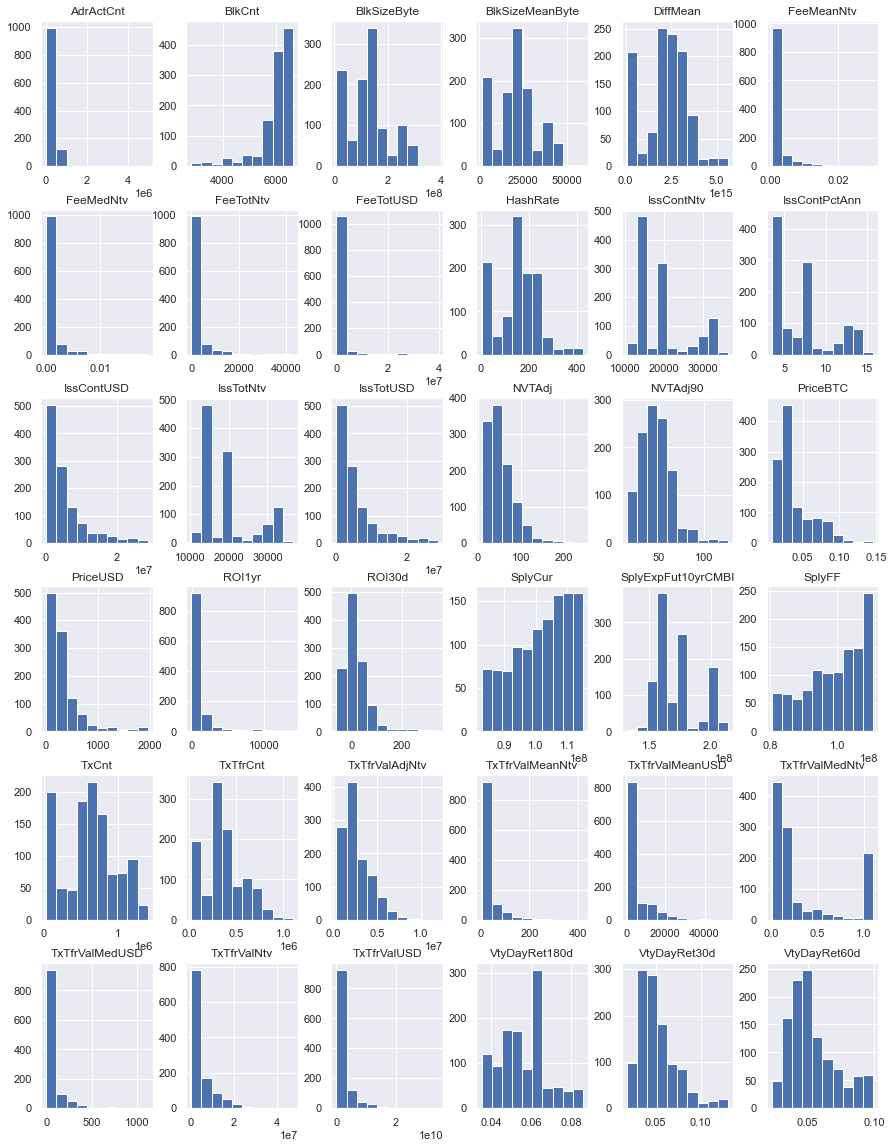

In [27]:
x_train.hist(figsize = (15,20));

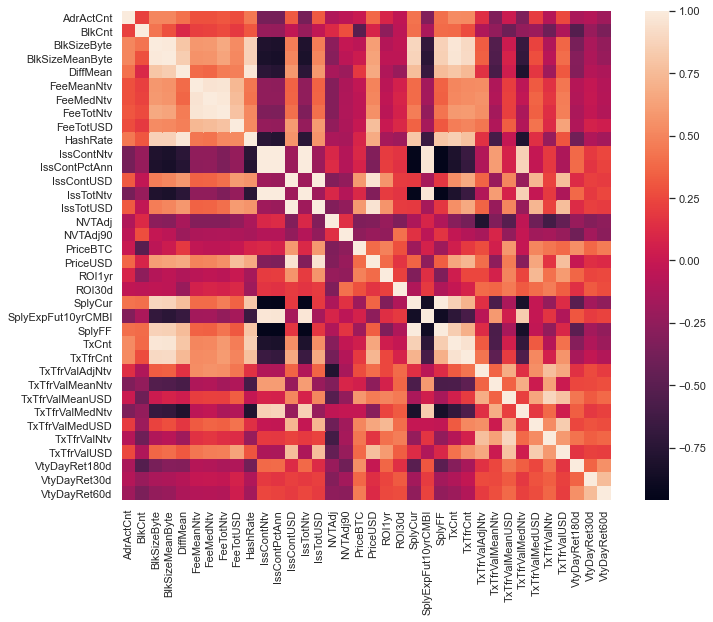

In [28]:
# correlation matrix

corrmat = x_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True);

In [29]:
train_date = x_train['date']
test_date = x_test['date']
x_train = x_train.drop('date',axis = 1)
x_test = x_test.drop('date',axis = 1)

x_train.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,FeeMeanNtv,FeeMedNtv,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
846,276777,6061,92625715,15282.249630,2.430000e+15,0.001045,0.000342,514.389211,59089.868480,170.165151,19630.21875,6.918412,2.254999e+06,19630.21875,2.254999e+06,79.222818,30.252111,0.028027,114.873849,-75.019664,-42.520073,1.035647e+08,176092513.3,1.012292e+08,492410,302383,1307257.965,5.140040,590.456156,0.100112,11.500229,1.554261e+06,1.785439e+08,0.050081,0.062392,0.050617
785,237819,6180,148979852,24106.772170,3.210000e+15,0.001318,0.000476,646.265081,145629.721100,229.717982,20514.18750,7.317192,4.622678e+06,20514.18750,4.622678e+06,98.225588,45.883780,0.034621,225.340538,-23.969850,-23.298253,1.023299e+08,177180688.4,9.998052e+07,490262,309898,1041785.000,3.883886,875.196936,0.102723,23.147616,1.203608e+06,2.712218e+08,0.051483,0.065826,0.056898
243,30344,5936,13347178,2248.513814,2.520000e+14,0.000725,0.000422,52.327124,2335.083263,17.352556,30914.37500,12.463150,1.379545e+06,30914.37500,1.379545e+06,39.989245,51.125497,0.037677,44.624720,359.362340,150.727613,9.053688e+07,204709268.1,8.835421e+07,72144,70060,2264030.725,103.076897,4599.777663,1.002874,44.752986,7.221567e+06,3.222604e+08,0.061851,0.117647,0.090266
1237,243589,5071,109405656,21574.769470,2.530000e+15,0.000592,0.000315,305.483178,39113.333520,148.436960,10493.87500,3.512030,1.343611e+06,10493.87500,1.343611e+06,110.232818,58.916436,0.017523,128.037602,-5.313104,-15.212722,1.090628e+08,146567176.9,1.067902e+08,516438,232792,989386.104,5.149664,659.350578,0.050399,6.453015,1.198800e+06,1.534915e+08,0.039306,0.031106,0.030163
312,129910,5336,42871543,8034.397114,7.370000e+14,0.001038,0.000441,257.508487,90805.148680,45.540522,28370.93750,11.189423,1.000444e+07,28370.93750,1.000444e+07,18.615221,60.069974,0.142398,352.629732,1601.153001,306.105472,9.254626e+07,196773747.2,9.050858e+07,248003,230718,4971536.860,81.178087,28625.806950,0.681493,240.314766,1.872925e+07,6.604489e+09,0.075324,0.089592,0.084377


In [30]:
x_test.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,FeeMeanNtv,FeeMedNtv,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
1604,520345,6410,287497357,44851.381750,3.780000e+15,0.006150,0.003266,7421.205327,5.431850e+06,280.754287,13298.37500,4.256395,9.733563e+06,13298.37500,9.733563e+06,20.528747,40.554875,0.026879,731.936296,457.506603,27.321267,1.140380e+08,163126614.6,1.099065e+08,1206703,660869,5.555038e+06,11.161491,8169.500656,0.161059,117.885096,7.376284e+06,5.398970e+09,0.041322,0.042046,0.042176
482,304550,6029,116513716,19325.545860,1.510000e+15,0.000587,0.000420,407.152401,1.890759e+05,105.383116,20336.53125,7.722709,9.444002e+06,20336.53125,9.444002e+06,21.542876,37.799660,0.041411,464.386073,5782.786221,51.829905,9.611697e+07,171026293.7,9.365105e+07,693808,514699,4.461659e+06,41.756004,19390.906550,0.200000,92.877215,2.149177e+07,9.980480e+09,0.063601,0.043646,0.038798
203,20317,5988,10890528,1818.725451,1.510000e+14,0.000855,0.000459,45.027386,7.049867e+02,10.450486,31246.40625,12.772869,4.892201e+05,31246.40625,4.892201e+05,16.503221,91.409272,0.013111,15.656842,140.917638,48.211186,8.929034e+07,204934830.3,8.693888e+07,52642,52435,5.410479e+06,198.796983,3112.533023,1.010032,15.813917,1.042392e+07,1.632057e+08,0.037938,0.033408,0.039678
49,23266,5843,9025683,1544.700154,7.540000e+13,0.002658,0.000999,115.639206,1.487368e+03,5.102155,32127.65625,13.898998,4.132306e+05,32127.65625,4.132306e+05,86.060067,32.449875,0.021197,12.862146,1735.430691,15.007023,8.437007e+07,207339310.7,8.193861e+07,43514,46161,9.803626e+05,30.571840,393.219467,1.002474,12.893972,1.411227e+06,1.815140e+07,0.067905,0.035639,0.057781
937,291044,6379,97837163,15337.382510,1.910000e+15,0.000673,0.000266,331.573277,4.298708e+04,141.024827,13597.68750,4.722827,1.762883e+06,13597.68750,1.762883e+06,64.970915,50.240073,0.034276,129.645784,-84.825881,21.579076,1.050887e+08,143144110.6,1.027679e+08,492382,259001,1.617473e+06,7.132534,924.702916,0.102203,13.250129,1.847333e+06,2.394990e+08,0.056937,0.047745,0.047324


In [31]:
train_date.head()

846      12/2/2018
785      10/2/2018
243       4/8/2017
1237    12/28/2019
312      6/16/2017
Name: date, dtype: object

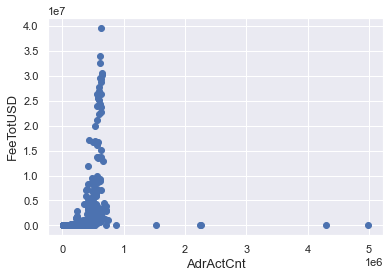

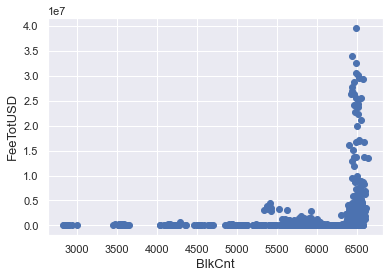

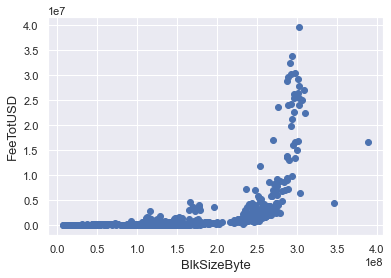

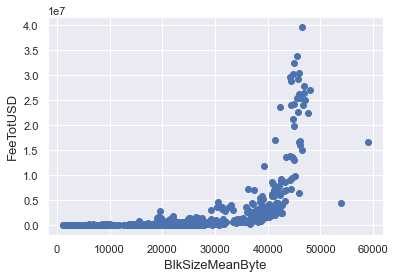

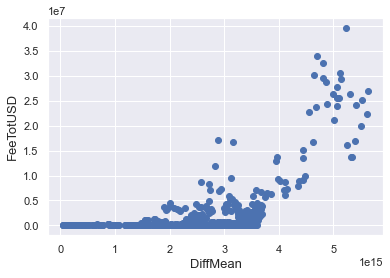

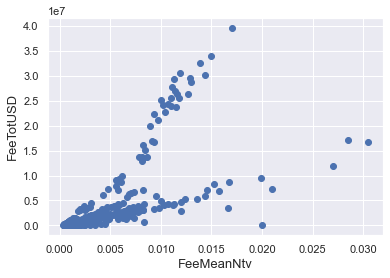

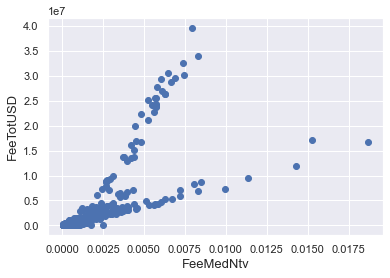

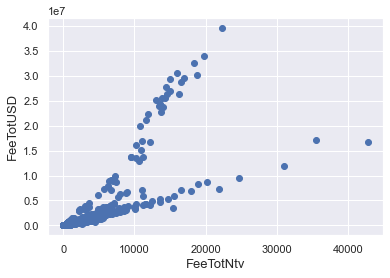

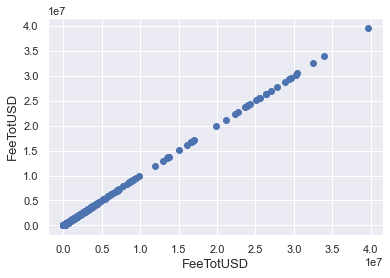

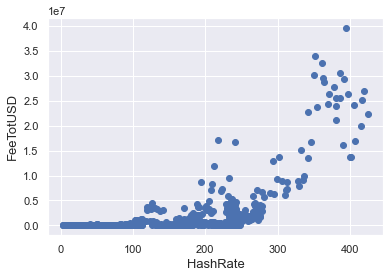

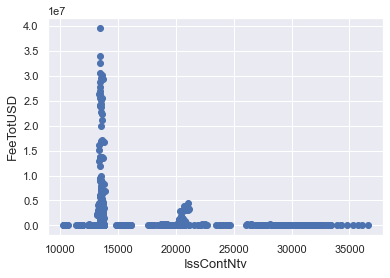

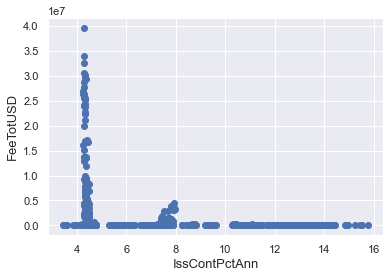

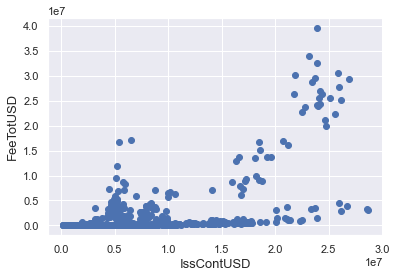

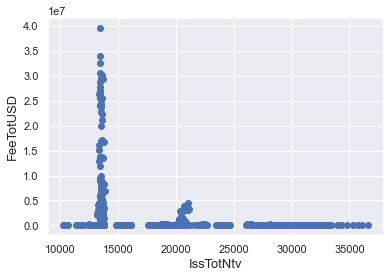

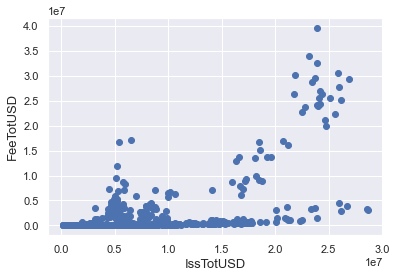

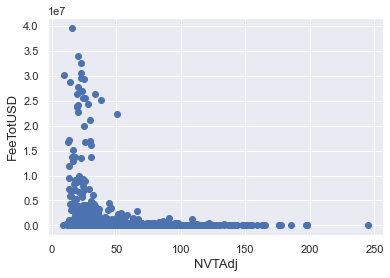

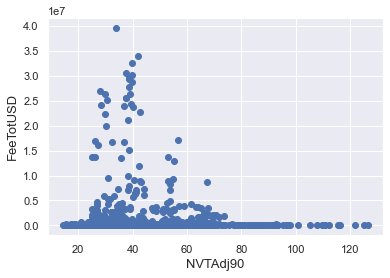

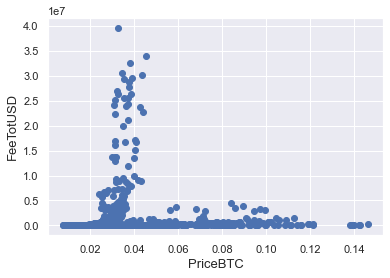

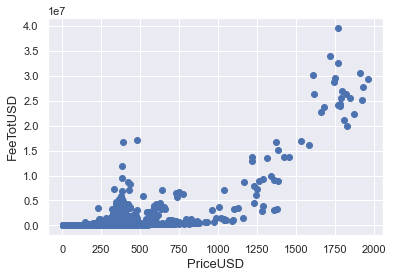

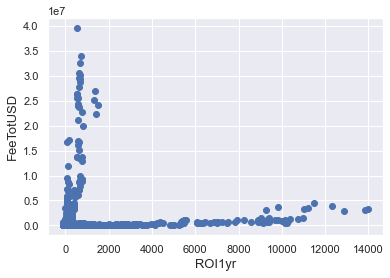

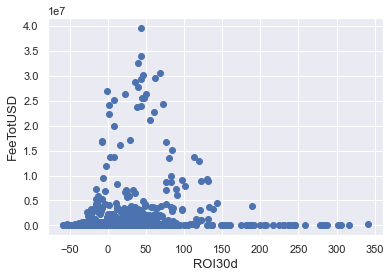

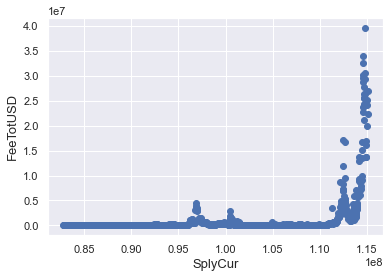

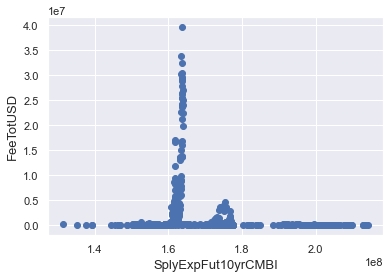

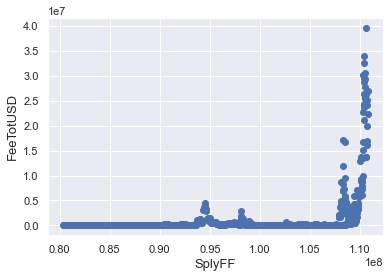

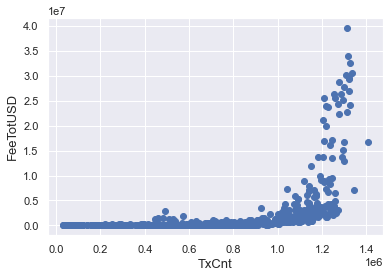

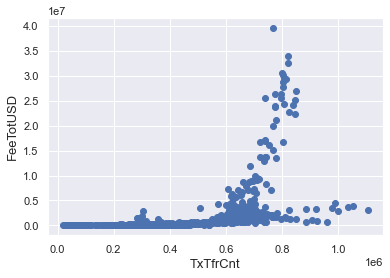

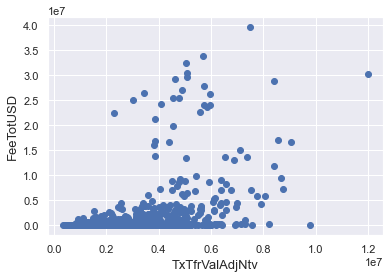

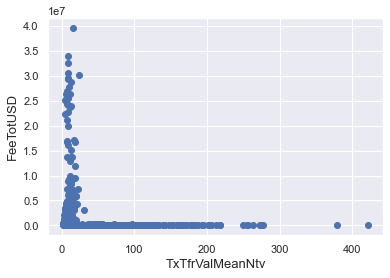

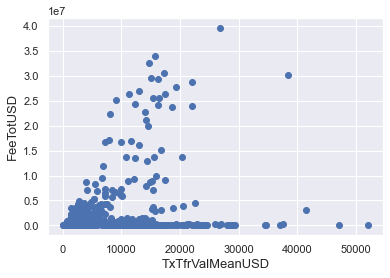

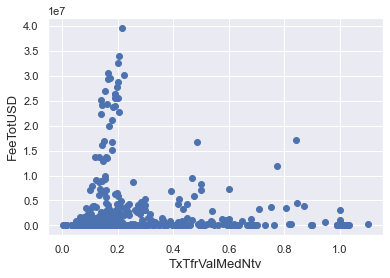

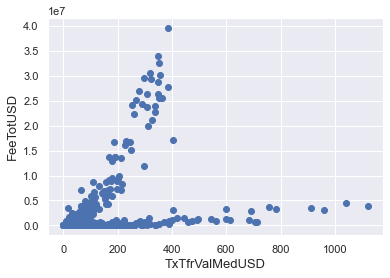

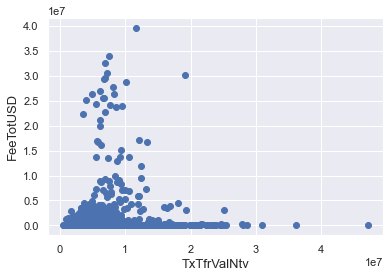

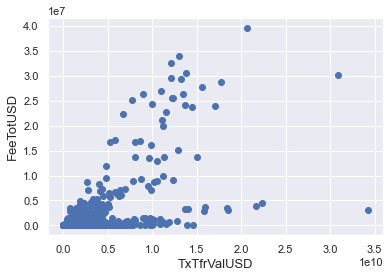

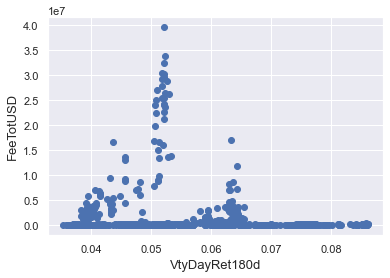

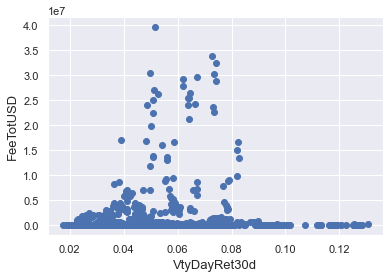

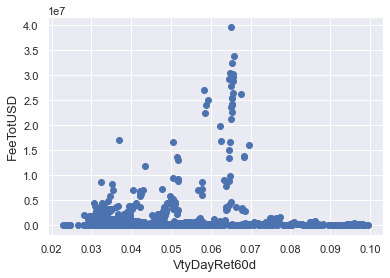

In [32]:
for i in list(x_train.columns):
    plt.scatter(x = x_train[i],y = y_train)
    plt.ylabel('FeeTotUSD',fontsize = 13)
    plt.xlabel(i,fontsize = 13)
    plt.show()

C:\Users\a2279\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


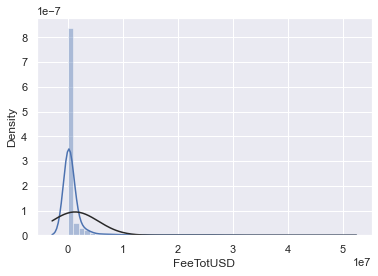

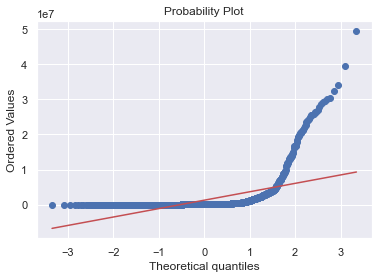

In [33]:
sns.distplot(y,fit=stats.norm);
fig = plt.figure()
res = stats.probplot(y,plot=plt)

In [34]:
copy_y_train = y_train.values

In [35]:
y_train = copy_y_train

C:\Users\a2279\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


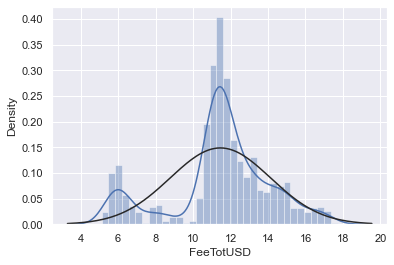

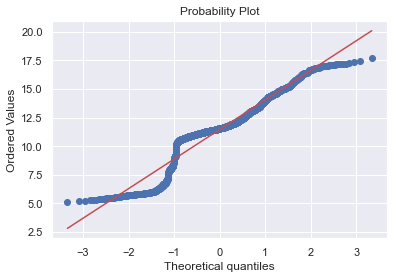

In [36]:
y_train = np.log(y)
sns.distplot(y_train,fit = stats.norm)
fig=plt.figure();
res = stats.probplot(y_train,plot = plt)

In [37]:
y.head()

0    609.564064
1    387.387553
2    404.228564
3    375.586648
4    356.299136
Name: FeeTotUSD, dtype: float64

In [38]:
y

0       6.095641e+02
1       3.873876e+02
2       4.042286e+02
3       3.755866e+02
4       3.562991e+02
            ...     
1676    1.941113e+07
1677    2.404734e+07
1678    2.505188e+07
1679    2.235458e+07
1680    2.698504e+07
Name: FeeTotUSD, Length: 1681, dtype: float64

In [39]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
new_data.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,FeeMeanNtv,FeeMedNtv,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,8/8/2016,20439,6059,9111556,1503.805248,5.480000e+13,0.001254,0.000420,53.896575,609.564064,3.845016,32175.93750,14.185434,363906.1494,32175.93750,363906.1494,41.476742,26.309202,0.019117,11.309885,842.498262,3.258575,82790681.59,200458024.1,80365076.47,42984,75328,1996074.839,39.049717,441.647804,0.147550,1.668772,2941537.082,33268445.80,0.084186,0.091690,0.096432
1,8/9/2016,22799,6130,9757894,1591.826101,5.680000e+13,0.000669,0.000420,31.476820,387.387553,4.026739,32666.40625,14.395987,402027.8740,32666.40625,402027.8740,23.231663,28.501093,0.020933,12.307074,925.598034,12.274988,82823348.00,201198238.5,80397742.88,47057,55293,3565106.361,100.900193,1241.786121,1.003216,12.346657,5579074.348,68662079.99,0.081587,0.092947,0.097002
2,8/10/2016,21183,6054,9727492,1606.787578,5.890000e+13,0.000722,0.000420,33.422242,404.228564,4.124060,32162.96875,14.168621,388998.1577,32162.96875,388998.1577,18.237591,27.804614,0.020500,12.094597,1121.676503,14.461676,82855510.97,201485552.9,80425443.19,46290,52842,4543117.061,132.054508,1597.146110,1.003051,12.131497,6978024.323,84396394.72,0.081409,0.092723,0.096978
3,8/11/2016,22502,6068,9833228,1620.505603,6.010000e+13,0.000666,0.000420,32.086722,375.586648,4.222562,32196.09375,14.177705,376866.8875,32196.09375,376866.8875,23.096806,27.319899,0.019854,11.705361,808.801289,10.916083,82887707.06,201169569.2,80457639.28,48171,55715,3588708.648,105.464380,1234.498595,1.001092,11.718140,5875947.911,68780089.21,0.081366,0.092968,0.096048
4,8/12/2016,20078,6014,9375881,1559.009145,6.000000e+13,0.000680,0.000422,30.199867,356.299136,4.178023,32112.03125,14.135211,378858.9228,32112.03125,378858.9228,40.062236,27.835137,0.020092,11.798037,525.956955,12.929347,82919819.09,201143589.4,80489751.31,44400,49494,2069775.100,72.095478,850.585094,1.001518,11.815945,3568293.588,42098858.66,0.081356,0.092935,0.094796


In [41]:
new_data_nodate = new_data.drop(labels='date',axis=1)

In [42]:
n_folds = 5

def mse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(data.values)
    nmse= np.sqrt(-cross_val_score(model, new_data_nodate.values, y_train, scoring="neg_mean_squared_error", cv = kf, error_score='raise'))
    return nmse

In [43]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

score = mse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.9868 (1.3206)



In [44]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
#droping corr data


In [46]:
# XGBoost

model_xgb.fit(new_data_nodate, y_train)
xgb_train_pred = model_xgb.predict(new_data_nodate)
xgb_pred = np.exp(model_xgb.predict(x_test))
#xgb_pred = np.expm1(model_xgb.predict(test))
print(rmse(y_train, xgb_train_pred))
xgb_pred.max(), xgb_pred.min()

0.04847846706843967


(36268070.0, 239.04291)

In [53]:
xgb_pred

array([5.53e+06, 2.06e+05, 7.04e+02, 1.36e+03, 4.36e+04, 1.70e+05,
       1.38e+07, 1.34e+05, 9.14e+06, 3.38e+06, 6.91e+04, 3.16e+04,
       1.47e+05, 1.37e+06, 1.30e+05, 7.21e+02, 8.40e+02, 8.30e+04,
       4.74e+05, 7.01e+04, 2.76e+05, 5.27e+06, 2.12e+05, 8.16e+04,
       7.78e+04, 7.43e+06, 4.95e+04, 6.66e+04, 2.58e+07, 3.68e+04,
       5.81e+05, 1.12e+05, 2.59e+03, 1.60e+05, 9.18e+05, 6.61e+04,
       2.55e+06, 9.20e+04, 2.06e+06, 2.89e+03, 7.55e+04, 8.32e+04,
       3.50e+02, 6.50e+04, 6.86e+04, 9.59e+04, 1.08e+05, 8.94e+04,
       3.79e+02, 3.28e+04, 9.57e+04, 5.61e+02, 2.95e+06, 2.34e+05,
       2.20e+07, 6.70e+04, 1.35e+06, 1.04e+05, 1.35e+05, 8.62e+04,
       3.54e+06, 7.82e+04, 9.26e+04, 3.98e+02, 6.83e+04, 2.23e+05,
       1.90e+05, 1.55e+05, 1.97e+06, 4.06e+02, 5.19e+05, 1.11e+06,
       1.16e+07, 8.94e+04, 5.06e+06, 4.90e+04, 8.90e+04, 5.76e+05,
       4.74e+04, 1.08e+05, 4.62e+04, 4.56e+02, 8.24e+04, 4.08e+02,
       7.64e+03, 1.31e+05, 1.72e+05, 5.03e+04, 2.09e+05, 8.59e

In [47]:
max(y_test)

49552861.82